In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Questão 1
#### Existem valores faltantes ou outliers no dataset? Se sim, como você abordaria o tratamento dessas inconsistências? Explique as técnicas que utilizaria para lidar com essas questões.


In [3]:
diabetes_df = pd.read_csv("diabetes.csv")

In [5]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,627.0,50,1
1,1,85.0,66.0,29.0,0.0,26.6,351.0,31,0
2,8,183.0,64.0,0.0,0.0,23.3,672.0,32,1
3,1,89.0,66.0,23.0,94.0,28.1,167.0,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2288.0,33,1


In [6]:
diabetes_df.shape

(768, 9)

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   764 non-null    float64
 2   BloodPressure             748 non-null    float64
 3   SkinThickness             758 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### Com base nos valores acima, é possível notar que as colunas algumas colunas possumem valores faltantes, pois o esperado é que todas as colunas tivessem 768 valores não nulos.

#### Uma das formas de tratar esses valores é escluindo essas linhas do conjunto de dados a ser utilizado na análise.
#### Pode-se também preencher com um valor fixo, um valor médio relacionado a determinada feature, e por interpolação.

In [10]:
# Após tratamento
df_diabetes = diabetes_df.dropna()

## Questão 2
#### Como as principais variáveis (Glucose, BloodPressure, BMI, etc.) estão distribuídas? Utilize histogramas e boxplots para representar visualmente essas distribuições e analise as características de cada uma

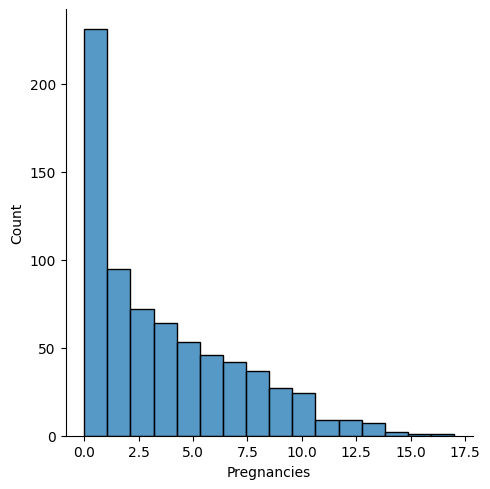

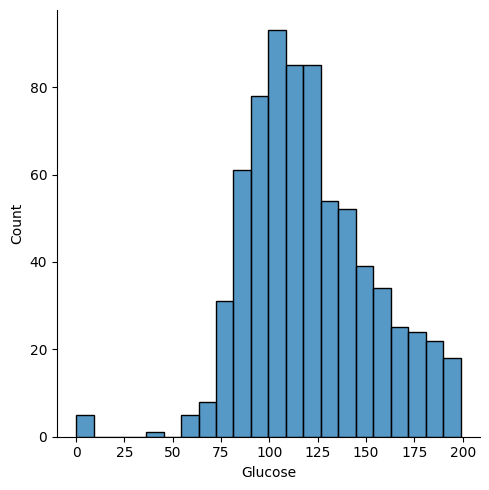

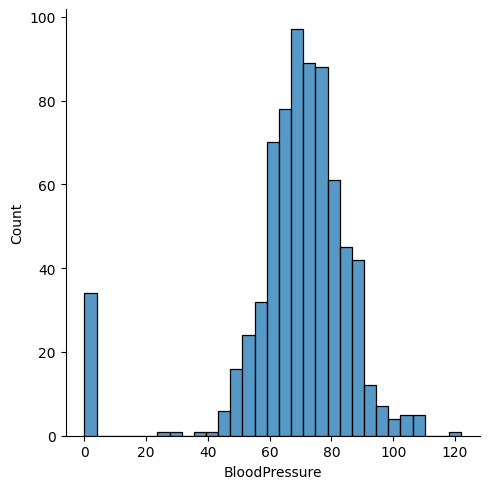

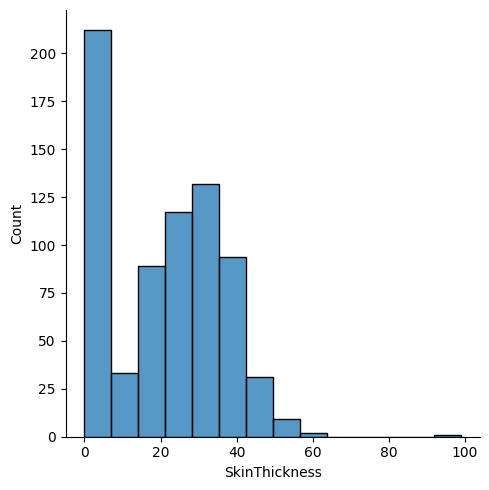

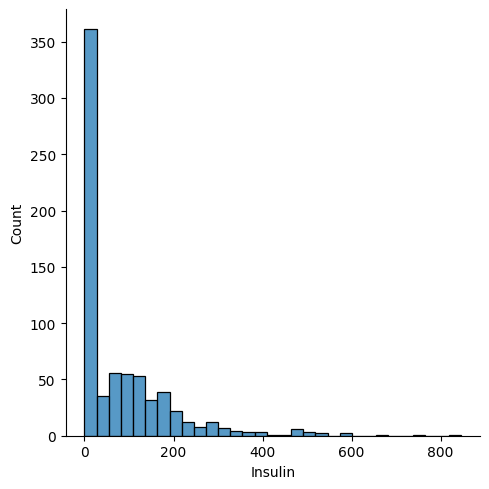

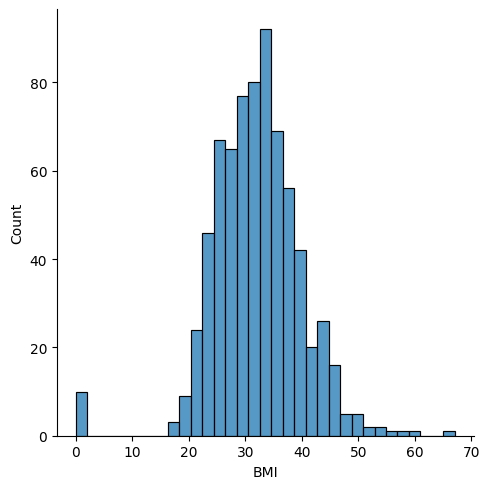

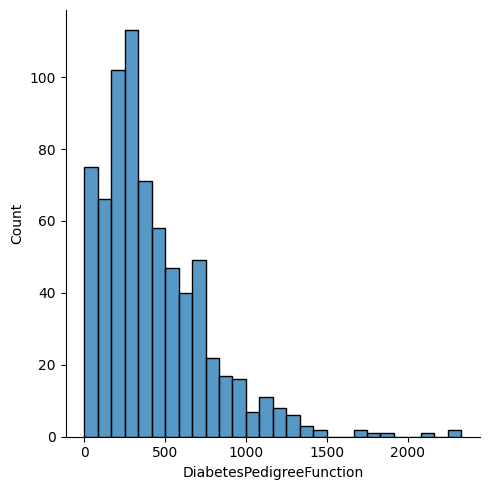

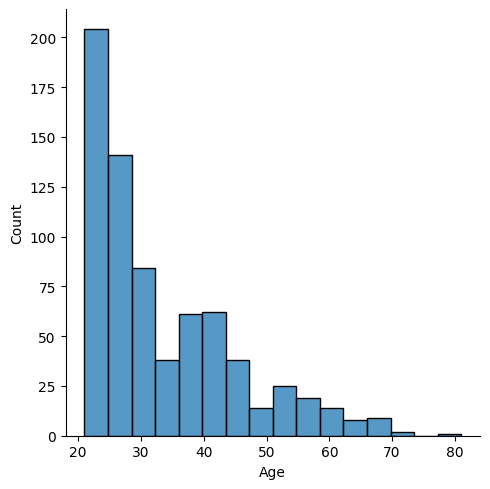

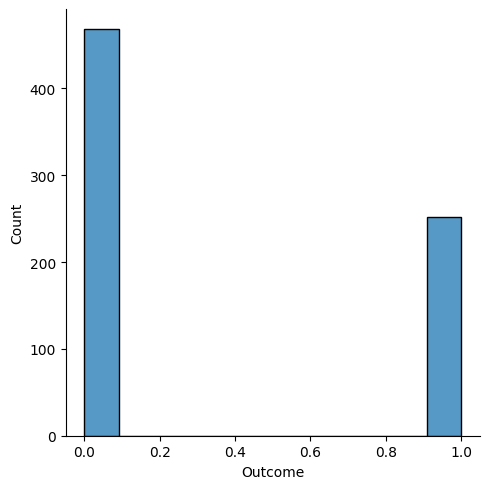

In [16]:
sns.displot(df_diabetes, x = "Pregnancies")
sns.displot(df_diabetes, x = "Glucose")
sns.displot(df_diabetes, x = "BloodPressure")
sns.displot(df_diabetes, x = "SkinThickness")
sns.displot(df_diabetes, x = "Insulin")
sns.displot(df_diabetes, x = "BMI")
sns.displot(df_diabetes, x = "DiabetesPedigreeFunction")
sns.displot(df_diabetes, x = "Age")
sns.displot(df_diabetes, x = "Outcome")

## Questão 3
#### Existe uma correlação entre a idade dos indivíduos e a presença de diabetes? Realize uma análise estatística (como teste de correlação) e utilize gráficos (como scatter plot ou boxplot) para ilustrar essa relação.


<Axes: xlabel='Outcome', ylabel='Age'>

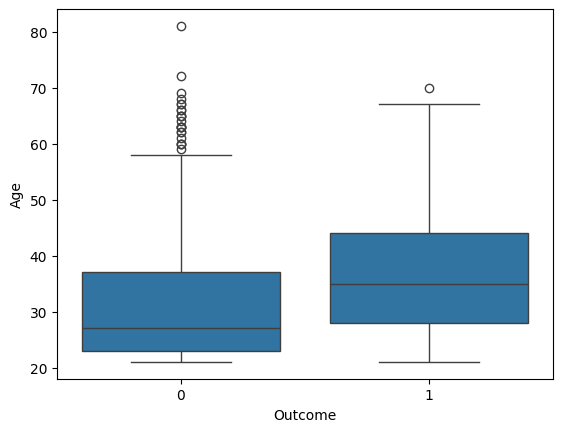

In [19]:
sns.boxplot(data=df_diabetes, x="Outcome", y="Age")


#### Como conclusão do teste de correlação, e como pode ser observado pelo gráfico, a idade e a ocorrência de casos de diabetes têm uma correlação positiva.

## Questão 4
#### Quais variáveis apresentam maior correlação com a presença de diabetes? Quais variáveis parecem ser as mais indicativas da presença de diabetes?


<Axes: >

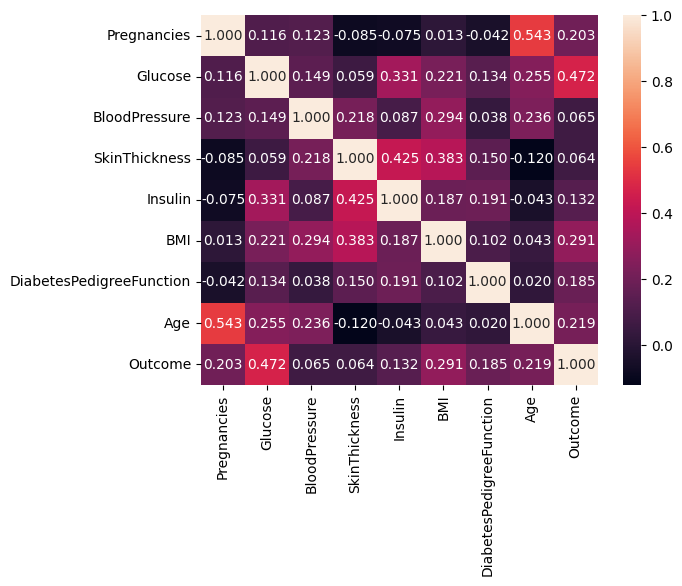

In [28]:
sns.heatmap(df_diabetes.corr(), annot= True, fmt = ".3f")

## Questão 5
#### Existe uma relação entre o IMC dos pacientes e o diagnóstico de diabetes?Compare os valores médios de IMC entre os grupos com e sem diabetes, e analise a diferença estatisticamente.


<Axes: ylabel='BMI'>

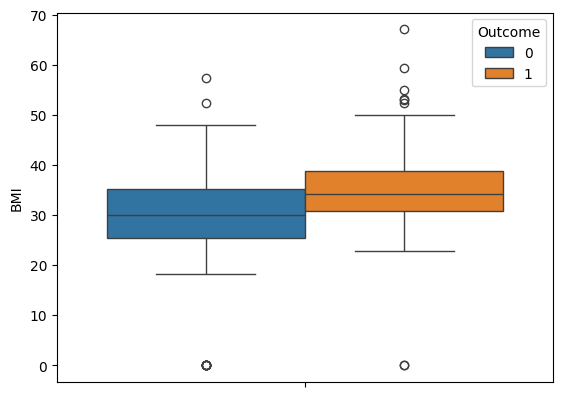

In [34]:
sns.boxplot(df_diabetes, y = "BMI", hue="Outcome")

#### Como é possível notar, a média do IMC das pessas com diabetes é maior que o das pessoas sem diabetes

## Questão 6

#### Existe um valor específico de glicose que pode ser considerado crítico para o diagnóstico de diabetes? Utilize gráficos de dispersão e cálculos estatísticos para investigar esse ponto e definir um limite crítico, se possível.
